In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime as dt

In [23]:
path = 'C:/Users/LENOVO/OneDrive/WaterSprint/ADB Project/DataSet Comparison/Cherat'

In [24]:
data = pd.read_csv(path+'/Daily/PMD_CHIRP_ERA5_PPT.csv')
data['date'] = pd.to_datetime(data['Date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.month

In [25]:
data.fillna(0)

,Date,PMD,CHIRP,ERA5,date,month,year
0,1/1/1988,0.0,20.0258,0.0000,1988-01-01,1,1
1,1/2/1988,0.0,0.0000,0.0449,1988-01-02,1,1
2,1/3/1988,0.0,0.0000,0.1544,1988-01-03,1,1
3,1/4/1988,0.0,0.0000,0.0000,1988-01-04,1,1
4,1/5/1988,0.0,0.0000,0.0000,1988-01-05,1,1
...,...,...,...,...,...,...,...
10953,12/27/2017,0.0,0.0000,0.0000,2017-12-27,12,12
10954,12/28/2017,0.0,0.0000,0.0000,2017-12-28,12,12
10955,12/29/2017,0.0,0.0000,0.0000,2017-12-29,12,12
10956,12/30/2017,0.0,0.0000,0.0000,2017-12-30,12,12


In [26]:
Monthly = data.groupby('month')[['ERA5', 'PMD','CHIRP']].mean().reset_index()

In [27]:
Monthly

,month,ERA5,PMD,CHIRP
0,1,1.355981,1.530860,1.839439
1,2,2.835198,2.930854,3.555833
2,3,3.947206,2.818925,2.771505
3,4,3.551865,2.069222,2.426280
4,5,2.369669,0.872778,1.079623
5,6,2.745993,1.076437,1.162599
6,7,7.006294,3.034194,3.524777
7,8,6.580709,3.017312,3.226590
8,9,3.196426,1.334778,1.956066
9,10,1.601862,0.666989,0.684024


In [28]:
Monthly['days'] = [31,28,31,30,31,30,31,31,30,31,30,31]

In [29]:
Monthly['CHIRP_M'] = Monthly['CHIRP']*Monthly['days']
Monthly['PMD_M'] = Monthly['PMD']*Monthly['days']
Monthly['ERA5_M'] = Monthly['ERA5']*Monthly['days']

In [30]:
Monthly

,month,ERA5,PMD,CHIRP,days,CHIRP_M,PMD_M,ERA5_M
0,1,1.355981,1.530860,1.839439,31,57.022597,47.456667,42.035413
1,2,2.835198,2.930854,3.555833,28,99.563311,82.063902,79.385534
2,3,3.947206,2.818925,2.771505,31,85.916657,87.386667,122.363383
3,4,3.551865,2.069222,2.426280,30,72.788403,62.076667,106.555947
4,5,2.369669,0.872778,1.079623,31,33.468320,27.056111,73.459743
5,6,2.745993,1.076437,1.162599,30,34.877967,32.293103,82.379780
6,7,7.006294,3.034194,3.524777,31,109.268087,94.060000,217.195127
7,8,6.580709,3.017312,3.226590,31,100.024290,93.536667,204.001977
8,9,3.196426,1.334778,1.956066,30,58.681983,40.043333,95.892767
9,10,1.601862,0.666989,0.684024,31,21.204750,20.676667,49.657727


In [32]:
Monthly.to_csv(path+'/Average Monthly/Monthly.csv')

Text(0.5, 1.0, 'Average Monthly Precipitation')

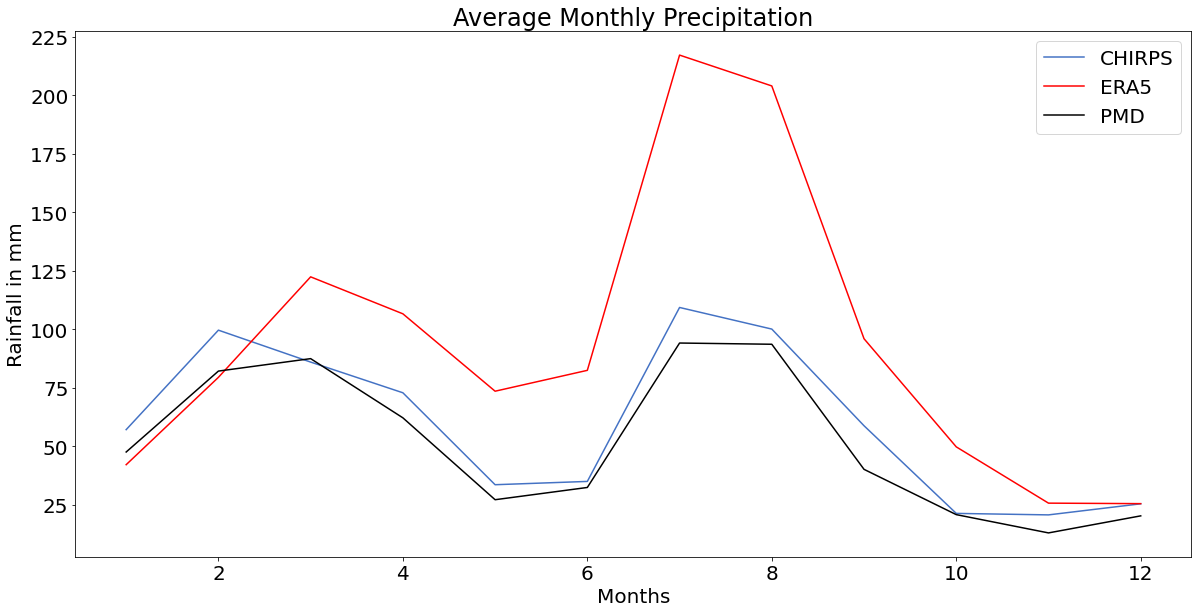

In [31]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(bottom=0.15)
# plt.xticks(rotation=45)
plt.xticks(fontsize=20)

plt.plot('month', 'CHIRP_M', data=Monthly, label='CHIRPS', color ='#4472C4')
plt.plot('month', 'ERA5_M', data=Monthly, label='ERA5', color='#FF0000')
plt.plot('month', 'PMD_M', data=Monthly, label='PMD', color='black')


#Labelling the plot
plt.legend(loc='upper left')
plt.legend(fontsize='20')
plt.xlabel('Months',fontsize = '20')
plt.ylabel('Rainfall in mm',fontsize = '20')
plt.tick_params(axis='y', labelsize=20)
plt.title('Average Monthly Precipitation', fontsize= '24')
# plt.savefig('C:/Users/LENOVO/OneDrive/WaterSprint/ADB Project/DataSet Comparison/Graphs/Average_Monthly.png')